In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
file_path = "C:\\Users\\Katerina\\github projects\\sales_data.csv" 
sales_data = pd.read_csv(file_path, encoding='latin1')

In [6]:
sales_data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [8]:
# Check for missing values
print(sales_data.isnull().sum())

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [10]:

# Drop the UNNECCESARY columns
sales_data.drop(columns=['ADDRESSLINE2', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME' ], inplace=True)


# Verify the columns has been removed
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   ORDERDATE        2823 non-null   object 
 6   STATUS           2823 non-null   object 
 7   QTR_ID           2823 non-null   int64  
 8   MONTH_ID         2823 non-null   int64  
 9   YEAR_ID          2823 non-null   int64  
 10  PRODUCTLINE      2823 non-null   object 
 11  MSRP             2823 non-null   int64  
 12  PRODUCTCODE      2823 non-null   object 
 13  CUSTOMERNAME     2823 non-null   object 
 14  PHONE            2823 non-null   object 
 15  ADDRESSLINE1     2823 non-null   object 
 16  CITY             2823 non-null   object 
 17  STATE         

In [12]:
# Display all unique country names
unique_countries = sales_data['COUNTRY'].unique()
print(unique_countries)

# Display all unique values in the TERRITORY column
unique_territories = sales_data['TERRITORY'].unique()
print(unique_territories)

['USA' 'France' 'Norway' 'Australia' 'Finland' 'Austria' 'UK' 'Spain'
 'Sweden' 'Singapore' 'Canada' 'Japan' 'Italy' 'Denmark' 'Belgium'
 'Philippines' 'Germany' 'Switzerland' 'Ireland']
[nan 'EMEA' 'APAC' 'Japan']


In [14]:
# Filter rows where TERRITORY is NaN
countries_with_missing_territory = sales_data[sales_data['TERRITORY'].isna()]['COUNTRY'].unique()

# Display the unique countries
print(countries_with_missing_territory)

['USA' 'Canada']


In [16]:
#map countries to territory
country_to_territory = {'USA': 'AMER', 'Canada': 'AMER'}
sales_data['TERRITORY'] = sales_data['COUNTRY'].map(country_to_territory).fillna(sales_data['TERRITORY'])

In [18]:
# Filter the data for Japan and get unique TERRITORY values
japan_territories = sales_data[sales_data['COUNTRY'] == 'Japan']['TERRITORY'].unique()

# Display the unique territories for Japan
print(japan_territories)


['Japan']


In [20]:
# Update the TERRITORY column for Japan entries
sales_data.loc[sales_data['COUNTRY'] == 'Japan', 'TERRITORY'] = 'APAC'

# Verify the change
print(sales_data[sales_data['COUNTRY'] == 'Japan'][['COUNTRY', 'TERRITORY']].head())

    COUNTRY TERRITORY
39    Japan      APAC
63    Japan      APAC
74    Japan      APAC
89    Japan      APAC
100   Japan      APAC


In [152]:
# Group by TERRITORY and get unique countries for each territory
territory_countries = sales_data.groupby('TERRITORY')['COUNTRY'].unique()

# Display the result
print(territory_countries)



TERRITORY
AMER                                        [USA, Canada]
APAC           [Australia, Singapore, Japan, Philippines]
EMEA    [France, Norway, Finland, Austria, UK, Spain, ...
Name: COUNTRY, dtype: object


In [154]:
# Filter rows where TERRITORY is 'APAC'
countries_with_apac_territory= sales_data[sales_data['TERRITORY']=='APAC']
print(countries_with_apac_territory['COUNTRY'].unique())
# Update TERRITORY where it is 'Japan' and set it to 'APAC'
sales_data.loc[sales_data['TERRITORY'] == 'Japan', 'TERRITORY'] = 'APAC'

['Australia' 'Singapore' 'Japan' 'Philippines']


In [156]:
# Group by TERRITORY and get unique countries for each territory
territory_countries = sales_data.groupby('TERRITORY')['COUNTRY'].unique()

# Display the result
print(territory_countries)

TERRITORY
AMER                                        [USA, Canada]
APAC           [Australia, Singapore, Japan, Philippines]
EMEA    [France, Norway, Finland, Austria, UK, Spain, ...
Name: COUNTRY, dtype: object


In [24]:
total_revenue = sales_data['SALES'].sum()
print(f"Total Revenue: ${total_revenue}")


Total Revenue: $10032628.85


In [28]:
## Aggregate the monthly sales trend
monthly_sales_trend = sales_data.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()

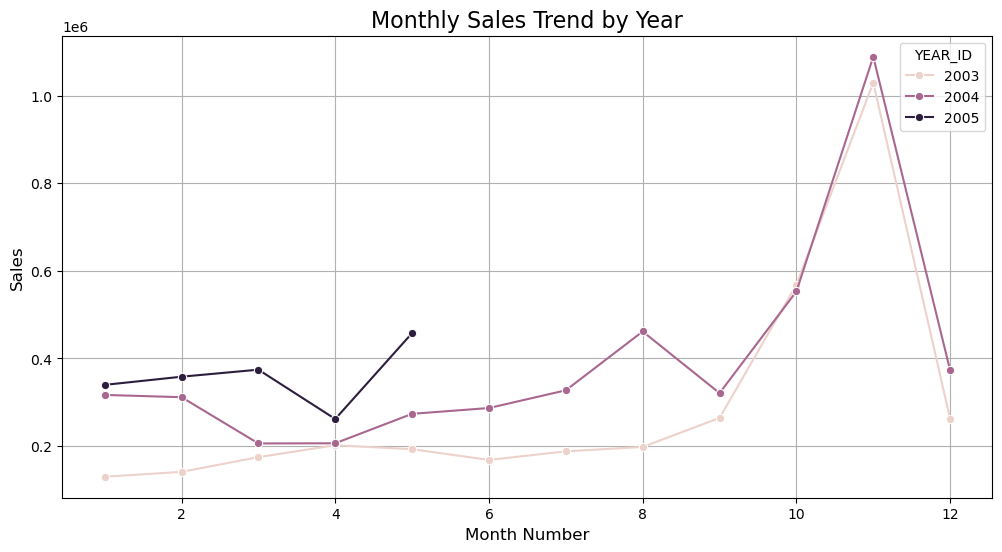

In [44]:
##Plot 
plt.figure(figsize=(12,6)) # size of figure in inches
sns.lineplot(monthly_sales_trend, x= 'MONTH_ID', y ='SALES', hue = 'YEAR_ID', marker = 'o')
plt.title('Monthly Sales Trend by Year',fontsize= 16)
plt.xlabel("Month Number",fontsize= 12)
plt.ylabel("Sales",fontsize= 12)

plt.grid()
plt.show()

In [46]:
#Steady Growth: Monthly sales display consistent upward trend from January to December with a peak in December.
#Seasonal Spike: December demonstrates significantly higher sales.
#Year-on-Year Increase: Sales in 2004 and 2005 outperform 2003 sales.


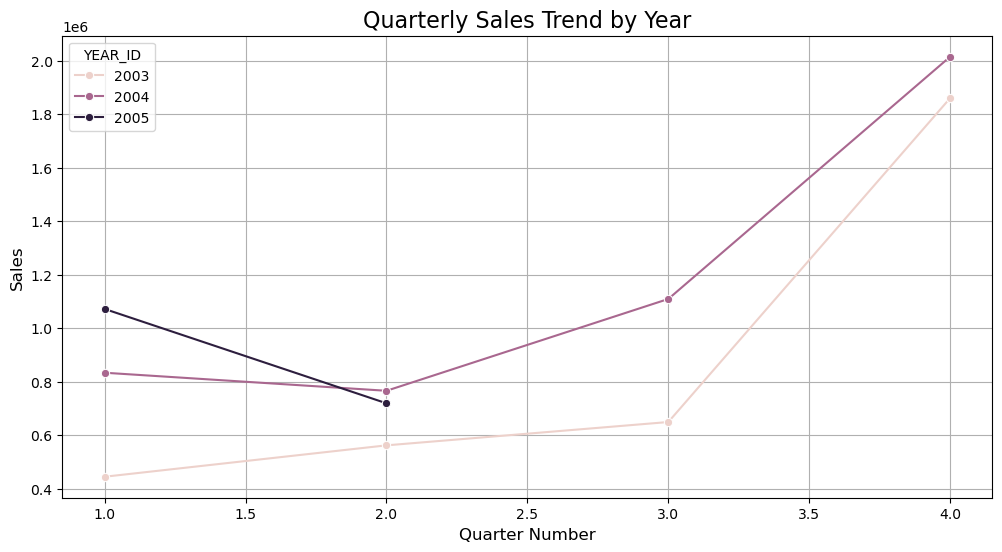

In [50]:
## Aggregate the quarterly sales trend  by grouping
quarterly_sales_trend = sales_data.groupby(['YEAR_ID','QTR_ID'])['SALES'].sum().reset_index()

##Plot 
plt.figure(figsize=(12,6))
sns.lineplot(quarterly_sales_trend, x= 'QTR_ID', y ='SALES', hue = 'YEAR_ID', marker = 'o')

## Add titles and Labels
plt.title('Quarterly Sales Trend by Year',fontsize= 16)
plt.xlabel("Quarter Number",fontsize= 12)
plt.ylabel("Sales",fontsize= 12)

# Show
plt.grid()
plt.show()

In [52]:
#Strong Q4 Performance: Sales significantly increase in the fourth quarter across all years.
#2005 Outperms Prior Years: The sales trend for 2005 is consistently higher than 2003 and 2004.

In [84]:
## pivot table to get total sales by product line
sales = pd.pivot_table(sales_data,index= 'PRODUCTLINE', values = 'SALES',aggfunc ='sum')

## total sales
total_sales = sales_data['SALES'].sum()

## percentage of total sales for each product line
sales['% of Total Sales'] = (sales['SALES'] / total_sales) * 100

sales.sort_values(by = '% of Total Sales', ascending = False)




,SALES,% of Total Sales
PRODUCTLINE,,
Classic Cars,3919615.66,39.068680
Vintage Cars,1903150.84,18.969613
Motorcycles,1166388.34,11.625949
Trucks and Buses,1127789.84,11.241220
Planes,975003.57,9.718326
Ships,714437.13,7.121136
Trains,226243.47,2.255077


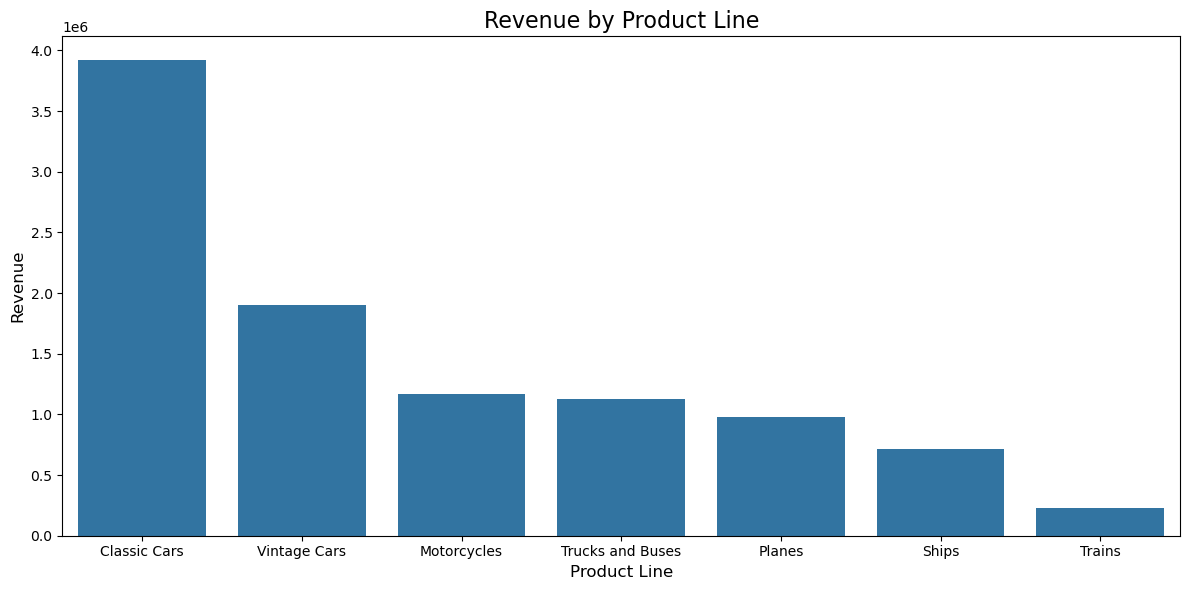

In [78]:

## Plot
plt.figure(figsize = (12,6))
sns.barplot(data = product_line_revenue, x = 'PRODUCTLINE', y = 'SALES')

## Add titles and labels
plt.title('Revenue by Product Line', fontsize =16)
plt.xlabel('Product Line', fontsize = 12)
plt.ylabel('Revenue', fontsize =12)

plt.tight_layout()
plt.show()

In [88]:
## AOV = (Total Revenue)/(Total Number of Orders)

## Total Revenue
total_revenue = sales_data['SALES'].sum()

## Total Number of Orders
total_orders = sales_data['ORDERNUMBER'].nunique()
 
## Average
average_order_value = total_revenue/total_orders

print(f"\033[1mTotal Revenue:\033[0m] {total_revenue:,.2f}")
print(f"\033[1mTotal Number of Orders:\033[0m {total_orders}")
print(f"\033[1mAverage Order Value:\033[0m {average_order_value:,.2f}")

Total Revenue:] 10,032,628.85
Total Number of Orders: 307
Average Order Value: 32,679.57


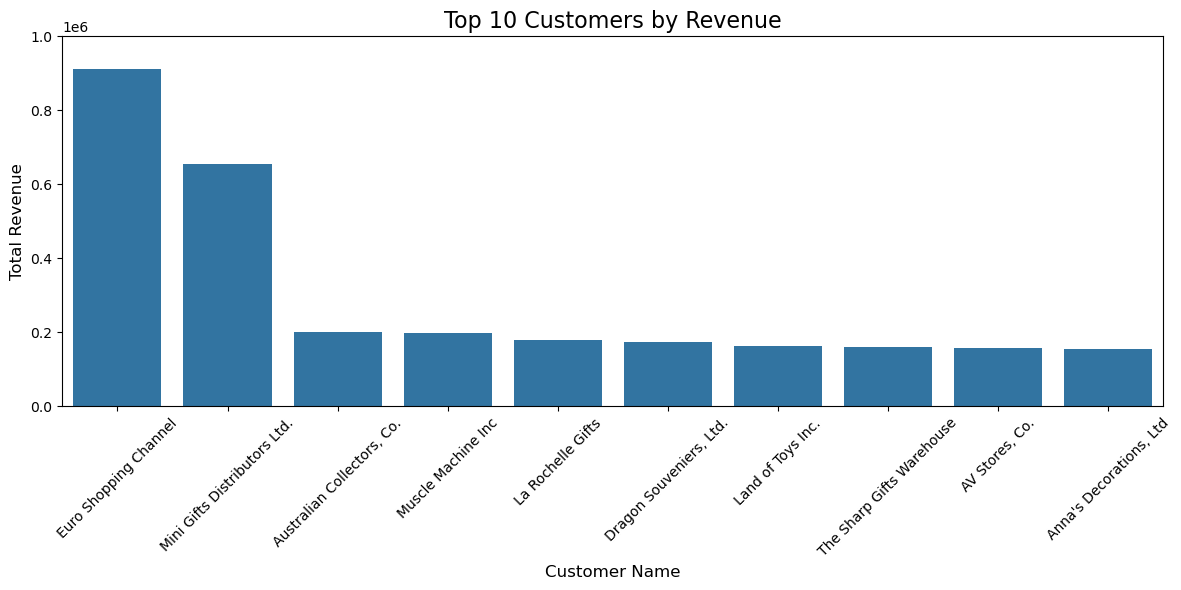

In [94]:
top_customers_by_revenue = sales_data.groupby('CUSTOMERNAME')['SALES'].sum().reset_index().sort_values(by = 'SALES',ascending = False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data =top_customers_by_revenue, x = 'CUSTOMERNAME', y= 'SALES')

## Add titles and labels
plt.title('Top 10 Customers by Revenue', fontsize =16)
plt.xlabel('Customer Name', fontsize = 12)
plt.ylabel('Total Revenue', fontsize = 12)
plt.xticks(rotation =45)
plt.yticks(range(0,1000001,200000))

plt.tight_layout()
plt.show()

In [96]:
Total = top_customers_by_revenue['SALES'].sum()

contribution_of_top_customers = (Total/total_sales)*100

print(f'Contribution of Top 10 Customers: {contribution_of_top_customers}')

Contribution of Top 10 Customers: 29.452726640037124


In [100]:
## Frequent orders by grouping and counting unique ordernumbers
frequent_orders = sales_data.groupby(['CUSTOMERNAME','COUNTRY','PRODUCTLINE','DEALSIZE'])['ORDERNUMBER'].nunique().reset_index().sort_values(by='ORDERNUMBER', ascending = False).head(20)
## renaming for clarity
frequent_orders.rename(columns = {'ORDERNUMBER':'AMOUNT_ORDERS'}, inplace =True)
frequent_orders

,CUSTOMERNAME,COUNTRY,PRODUCTLINE,DEALSIZE,AMOUNT_ORDERS
268,Euro Shopping Channel,Spain,Classic Cars,Medium,16
269,Euro Shopping Channel,Spain,Classic Cars,Small,15
284,Euro Shopping Channel,Spain,Vintage Cars,Small,12
467,Mini Gifts Distributors Ltd.,USA,Classic Cars,Medium,12
478,Mini Gifts Distributors Ltd.,USA,Vintage Cars,Medium,10
283,Euro Shopping Channel,Spain,Vintage Cars,Medium,10
468,Mini Gifts Distributors Ltd.,USA,Classic Cars,Small,10
479,Mini Gifts Distributors Ltd.,USA,Vintage Cars,Small,10
475,Mini Gifts Distributors Ltd.,USA,Trucks and Buses,Medium,9
281,Euro Shopping Channel,Spain,Trucks and Buses,Small,8


In [104]:
## Top 10 popular products based on quantity ordered 
popular_products_by_volume = sales_data.groupby(['PRODUCTCODE','PRODUCTLINE'])['QUANTITYORDERED'].sum().reset_index().sort_values(by='QUANTITYORDERED', ascending =False).head(10)

popular_products_by_volume

,PRODUCTCODE,PRODUCTLINE,QUANTITYORDERED
39,S18_3232,Classic Cars,1774
76,S24_3856,Classic Cars,1052
50,S18_4600,Trucks and Buses,1031
106,S700_4002,Planes,1029
14,S12_4473,Trucks and Buses,1024
77,S24_3949,Planes,1008
91,S50_1341,Vintage Cars,999
16,S18_1097,Trucks and Buses,999
29,S18_2432,Trucks and Buses,998
18,S18_1342,Vintage Cars,997


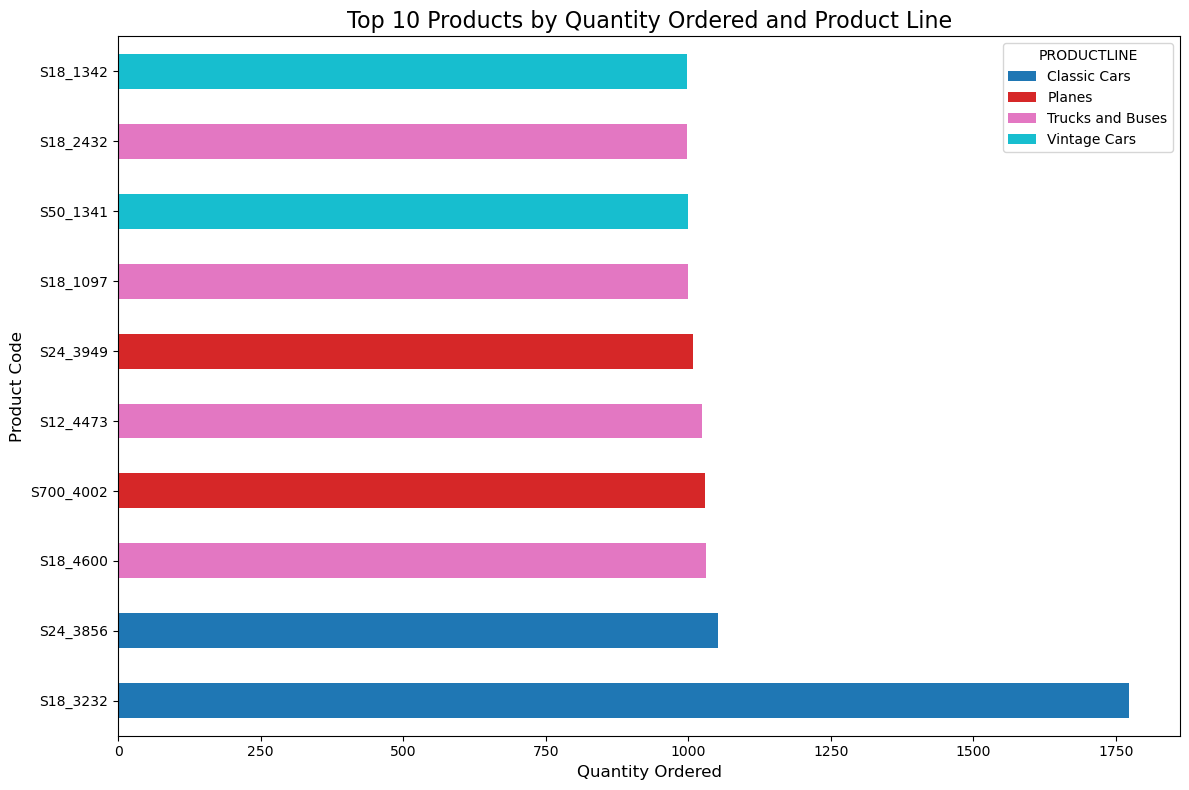

In [106]:
## pivot table for stacked bar chart
pivot_data = popular_products_by_volume.pivot(
    index='PRODUCTCODE', columns='PRODUCTLINE', values='QUANTITYORDERED'
).fillna(0)

pivot_data['Total Orders'] = pivot_data.sum(axis=1)
pivot_data = pivot_data.sort_values(by='Total Orders', ascending=False).drop(columns='Total Orders')

# Plot stacked horizontal bar chart
pivot_data.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 8),
    colormap='tab10')

## Add Titles and labels
plt.title('Top 10 Products by Quantity Ordered and Product Line', fontsize=16)
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Product Code', fontsize=12)

plt.tight_layout()
plt.show()

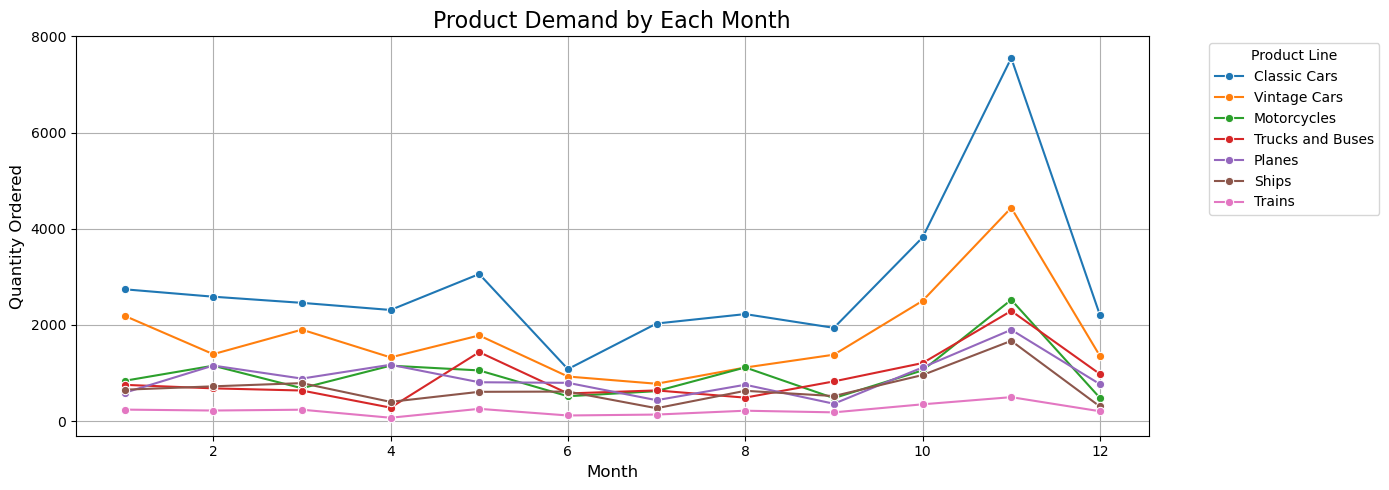

In [108]:
## Product Demand by each month by grouping Month_id and Product line together and summing quantity ordered 
product_demand_by_each_month = sales_data.groupby(['MONTH_ID','PRODUCTLINE'])['QUANTITYORDERED'].sum().reset_index().sort_values(by = 'QUANTITYORDERED', ascending = False)

## Plot barplot
plt.figure(figsize = (14,5))
sns.lineplot(product_demand_by_each_month, x = "MONTH_ID", y = 'QUANTITYORDERED', hue = 'PRODUCTLINE', marker = 'o')

# Add titles and labels
plt.title('Product Demand by Each Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Quantity Ordered', fontsize=12)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yticks(range(0,8001,2000))

plt.grid()
plt.tight_layout()
plt.show()

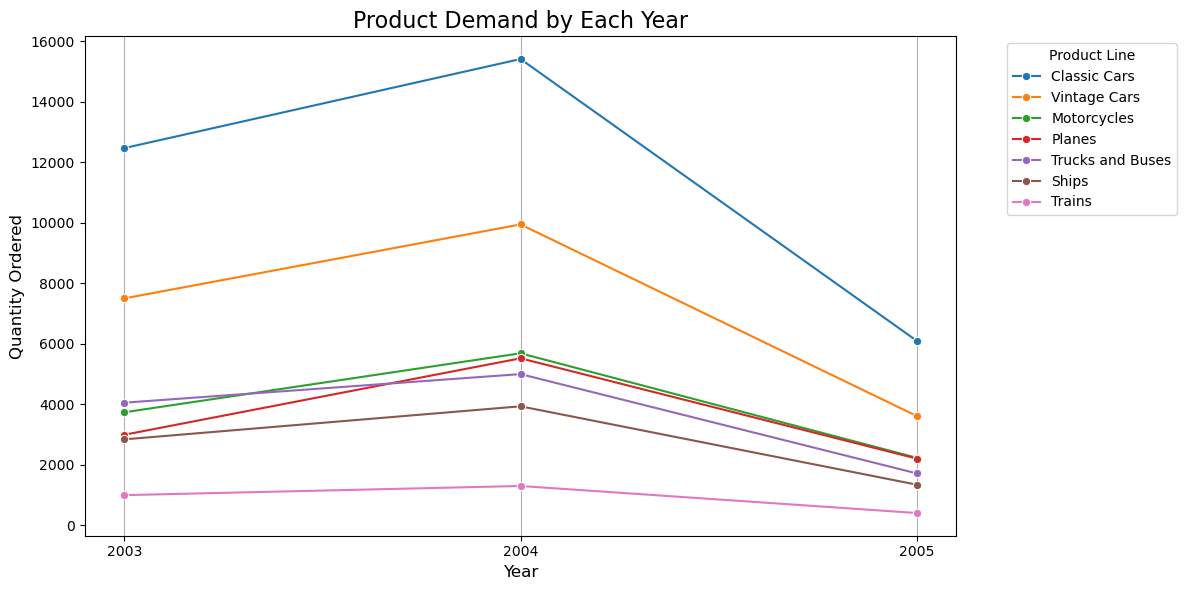

In [112]:
## Product Demand by each Year by grouping Year_id and Product line together and summing quantity ordered 
product_demand_by_each_year = sales_data.groupby(['YEAR_ID','PRODUCTLINE'])['QUANTITYORDERED'].sum().reset_index().sort_values(by = 'QUANTITYORDERED', ascending = False)

## Plot barplot
plt.figure(figsize = (12,6))
sns.lineplot(product_demand_by_each_year, x = "YEAR_ID", y = 'QUANTITYORDERED', hue = 'PRODUCTLINE', marker='o')

# Add titles and labels
plt.title('Product Demand by Each Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Quantity Ordered', fontsize=12)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(2003,2006,1))

plt.grid(axis = 'x')
plt.tight_layout()
plt.show()

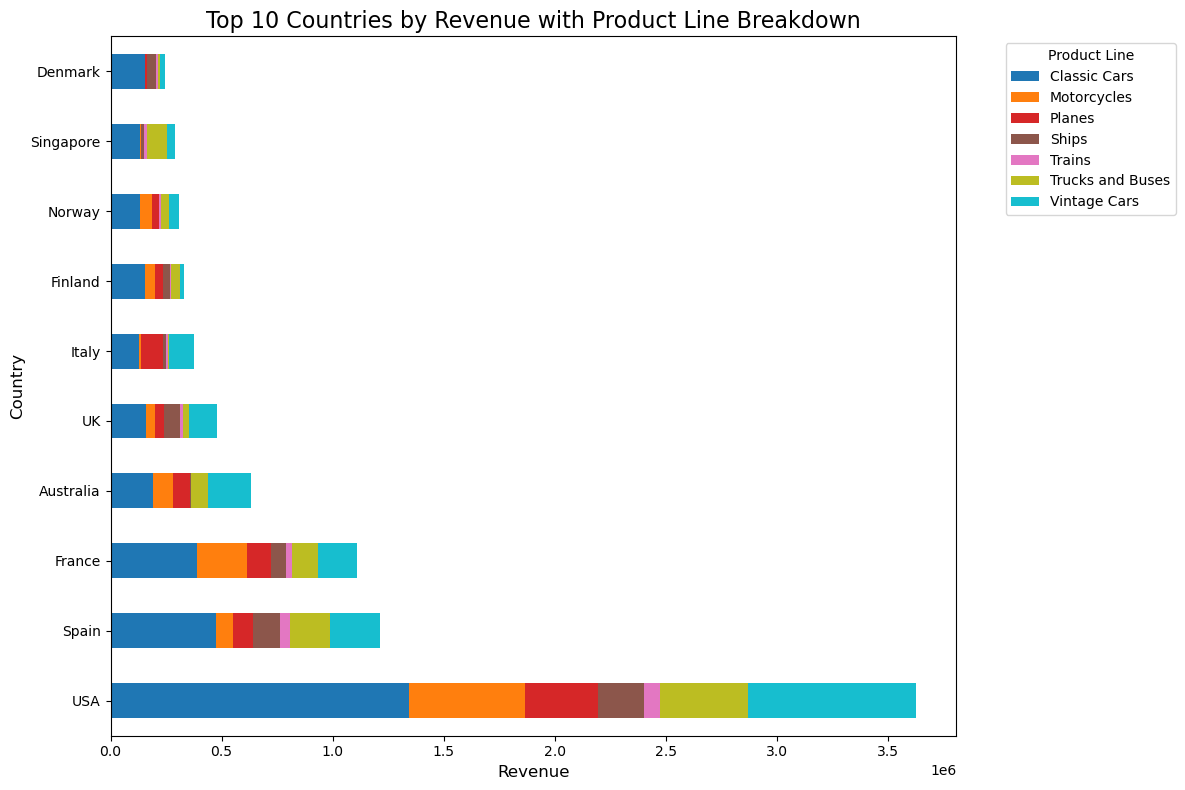

In [118]:
#  Calculate total revenue by country and filter top 10
top_countries = (
   sales_data.groupby('COUNTRY')['SALES']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# calculate sales by product line of top countries
top_countries_data = sales_data[sales_data['COUNTRY'].isin(top_countries)]
sales_by_country_productline = (
    top_countries_data.groupby(['COUNTRY', 'PRODUCTLINE'])['SALES']
    .sum()
    .reset_index()
)

# Create pivot table for stacked bar chart
pivot_data = sales_by_country_productline.pivot(
    index='COUNTRY', columns='PRODUCTLINE', values='SALES'
).fillna(0)

pivot_data['Total Revenue'] = pivot_data.sum(axis=1)
pivot_data = pivot_data.sort_values(by='Total Revenue', ascending=False).drop(columns='Total Revenue')

# Plot stacked horizontal bar chart
pivot_data.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 8),
    colormap='tab10'
)

# Add titles and labels
plt.title('Top 10 Countries by Revenue with Product Line Breakdown', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Sales by Region:
 TERRITORY
AMER    3852061.39
APAC    1201295.05
EMEA    4979272.41
Name: SALES, dtype: float64


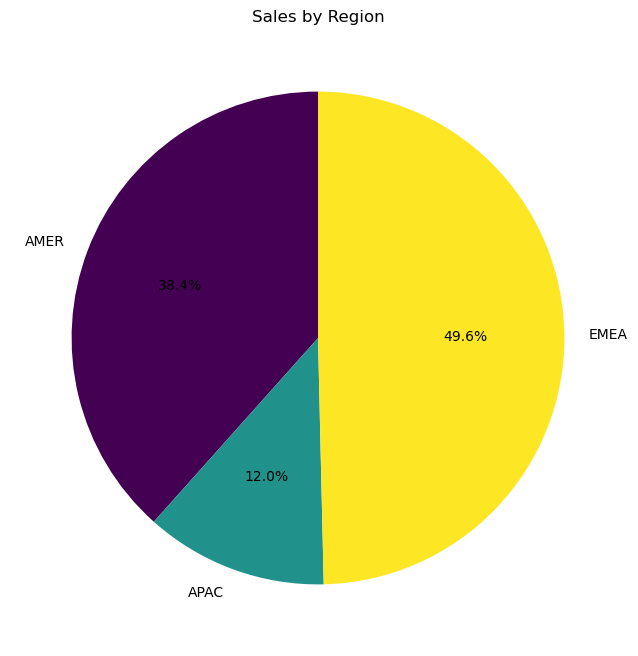

In [158]:
# Pie chart for sales by region
sales_by_region = sales_data.groupby('TERRITORY')['SALES'].sum()
print("Sales by Region:\n", sales_by_region)
sales_by_region.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90, colormap='viridis')
plt.title('Sales by Region')
plt.ylabel('')
plt.show()


In [ ]:
##Key Insights:
##Sales peaked in Q4, suggesting a high demand during the final quarter of the year.
##The 'Classic Cars' product line generated the highest revenue, contributing 39% of total sales.
##'Trains' are among the lowest-performing product lines in terms of sales.
##The top 10 customers accounted for approximately 30% of total revenue.
##Most of the top customers are from the 'Classic Cars' product line.
##The Euro Shopping Channel has the most frequent orders, indicating high customer loyalty.
##The 'Classic Cars' product line is associated with frequent orders, especially in Spain.
##The USA generates the most revenue, with 'Classic Cars' being the top-selling product.
##Classic Cars show consistent demand across all years.